In [19]:
import numpy as np
from libsvm.svmutil import svm_save_model, svm_load_model, svm_predict
import time
import os
import matplotlib.pyplot as plt

Import Functions from train.py

In [20]:
from train import get_data, spatial_frequency_feature_fusion, prepare_data, train_model, visualize

Run this for preprocessing

- must include /utils
- example path: "/Users/Danniel/Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data/utils"

In [ ]:
import sys
# path of the folder "Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data"
sys.path.append("/Users/Danniel/Detection-of-GAN-Generated-Images-using-Spatial-Frequency-Domain-Fusion-Data/utils")

from preprocessing_save import load_image, save_image

# directory for reading
img_real = "/Users/Danniel/Downloads/New Datasets/real"
img_gan = "/Users/Danniel/Downloads/New Datasets/gan"

# directory for saving (must be an empty folder)
save_dir_real = "/Users/Danniel/Downloads/New Datasets/p_real"
save_dir_gan = "/Users/Danniel/Downloads/New Datasets/p_gan"

# store the images
image_real = load_image(img_real)
image_gan = load_image(img_gan)

save_image(image_real, save_dir_real)
save_image(image_gan, save_dir_gan)

Provide directory for Preprocessed Real and GAN-Generated Images

In [21]:
real_directory = "/Users/Danniel/Downloads/New Datasets/p_real"
gan_directory = "/Users/Danniel/Downloads/New Datasets/p_gan"

"get_data" function will load the preprocessed images from the directory and store it in a list

In [22]:
# run data preparation
real_data = get_data(real_directory)
gan_data = get_data(gan_directory)

Preprocessed Images:  100
Preprocessed Images:  100


Run to perform the proposed "spatial frequency feature fusion" method to extract meaningful features of an image to classify whether it is GAN-Generated or Real. The feature vector of each image will be stored in "fused_features" list

In [23]:
# run feature extraction & feature fusion
extracted_real = spatial_frequency_feature_fusion(real_data)
extracted_gan = spatial_frequency_feature_fusion(gan_data)

Performing Feature Extraction
Applying Local Binary Pattern



[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0  30  50 ... 251 249   0]
 [  0  30  56 ... 249  56   0]
 [  0   0   0 ...   0   0   0]]

1 out of 100 images
Percentage: 1.0




[[  0   0   0 ...   0   0   0]
 [  0 224 227 ... 243 255   0]
 [  0 227 195 ... 235 201   0]
 ...
 [  0 252 124 ... 121 248   0]
 [  0 120 252 ...  56 120   0]
 [  0   0   0 ...   0   0   0]]

2 out of 100 images
Percentage: 2.0




[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 251   0]
 [  0 255 239 ... 255 255   0]
 ...
 [  0 128 134 ... 135 207   0]
 [  0 135 199 ... 199 255   0]
 [  0   0   0 ...   0   0   0]]

3 out of 100 images
Percentage: 3.0




[[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 239 207   0]
 [  0 255 124 ... 199 255   0]
 ...
 [  0 255 255 ... 131 255   0]
 [  0 249 236 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]

4 out of 100 images
Percentage: 4.0




[[  0

***
Run this cell for multi-tasking (not yet proven if this will optimized the process as the functions imported are not asynchronous)
***

In [ ]:
# for multi-tasking
import asyncio

async def feature_extraction(images):
    await asyncio.sleep(1)
    fused_features = spatial_frequency_feature_fusion(images)

    return fused_features

async def main():
    extracted_real = asyncio.create_task(feature_extraction(real_data))
    extracted_gan = asyncio.create_task(feature_extraction(gan_data))

    e_real = await extracted_real
    e_gan = await extracted_gan

    return e_real, e_gan
   

real, gan = await main()


For Data Visualization
- provide real and gan parameter

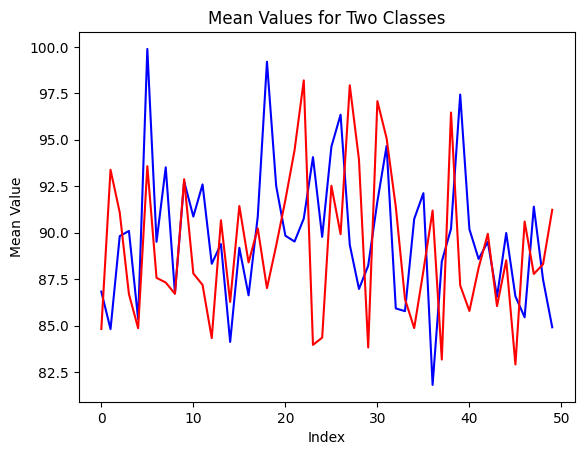

([86.83341979980469,
  84.81181526184082,
  89.81656646728516,
  90.09515762329102,
  85.35041809082031,
  99.88656997680664,
  89.5121021270752,
  93.51815986633301,
  86.74153518676758,
  92.7552490234375,
  90.86929893493652,
  92.59789848327637,
  88.32902336120605,
  89.3895263671875,
  84.12306594848633,
  89.18910598754883,
  86.63323211669922,
  90.87167358398438,
  99.1978588104248,
  92.5197925567627,
  89.83945083618164,
  89.52494049072266,
  90.7623462677002,
  94.06435012817383,
  89.77739524841309,
  94.62456703186035,
  96.34903144836426,
  89.34683418273926,
  86.97481536865234,
  88.2247085571289,
  91.67945671081543,
  94.66893005371094,
  85.92717170715332,
  85.77957153320312,
  90.74023628234863,
  92.12630271911621,
  81.81204795837402,
  88.45141983032227,
  90.21294975280762,
  97.4333610534668,
  90.18894577026367,
  88.58641052246094,
  89.51363945007324,
  86.55243110656738,
  89.98273277282715,
  86.5776481628418,
  85.45104217529297,
  91.40215301513672,
 

In [24]:
# visualize
visualize(real, gan)

Data Preparation before feeding to the classifier
- assigning of labels
- flattening of feature vector

In [25]:
# prepare the data
labels, datasets = prepare_data(real, gan)
print(labels, datasets)

----------------------------Preparing the Data-------------------------------

Labels:  100
Datasets:  100
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 1, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), a

Run this cell if you want to store the data in txt
- it can be useful for storing training and testing data to avoid repetition of process

Suggested format

- For Training Data
    - train_labels.txt
    - train_features.txt
***
- For Testing Data
    - test_labels.txt
    - test_features.txt
   

In [26]:
# Save the data
np.savetxt("/Users/Danniel/Downloads/Text File Data/train_labels.txt", labels)
np.savetxt("/Users/Danniel/Downloads/Text File Data/train_features.txt", datasets)

In [27]:
# Load the data
loaded_labels = np.loadtxt("/Users/Danniel/Downloads/Text File Data/train_labels.txt")
loaded_features = np.loadtxt("/Users/Danniel/Downloads/Text File Data/train_features.txt")

print("Labels: ", len(loaded_labels))
print("Features: ", len(loaded_features))

Labels:  100
Features:  100


Model Training
- Support Vector Machine
- Linear Kernel


***
    - change the parameter if the data are from loaded text file
    - train_model(loaded_labels, loaded_features)

In [29]:
# train the data
model = train_model(loaded_labels, loaded_features)

----------------------Model Training--------------------------

Cross Validation Accuracy = 99%
99.0


Save the model using ".model" extension

In [30]:
# save the model
model_file = "/Users/Danniel/Downloads/faces_new.model"
svm_save_model(model_file, model)

Load the model

In [31]:
model_file = svm_load_model("/Users/Danniel/Downloads/faces_new.model")

Model Testing
- provide directory (folder) for testing datasets

In [32]:
from preprocessing import preprocessing
import os
import numpy as np
from train import spatial_frequency_feature_fusion

# test the model
def get_test_data(directory):
    images = []

    # load the images and store in images list
    for filename in os.listdir(directory):
        image = os.path.join(directory, filename)
        if image is not None:
            images.append(image)

    # preprocessing
    preprocessed_img = []
    for i in images:
        preprocessed_img.append(preprocessing(i))   

    # flatten the feature vector
    fused_features = spatial_frequency_feature_fusion(preprocessed_img)
    labels = np.ones((len(fused_features), 1)) 
    true_label = labels.reshape(labels.shape[0])

    feature_vector = []
    for i in fused_features:
        print(i)
        feature_vector.append(i.flatten())


    return feature_vector


def prepare_test_data(real, gan):
    print("\n\n-------------------PREPARING TEST DATA----------------------------\n")
    #label real  and gan datasets
    real_label = np.ones((len(real), 1))
    gan_label = np.zeros((len(gan), 1))

    # combine the labels and datasets
    dataset_labels = np.vstack((real_label, gan_label))
    datasets = np.vstack((real, gan))

    feature_vector = [i.flatten() for i in datasets]
    true_label = dataset_labels.reshape(dataset_labels.shape[0])

    return feature_vector, true_label


def predict(feature_vector, true_label, model):  
    # predict the result
    print("\n\n-------------------THE MODEL IS PREDICTING----------------------------\n")
    predicted_labels, _, likelihood = svm_predict(true_label, feature_vector, model, '-b 1')


    print("------------------------------------------RESULT-----------------------------------\n")
    result = []
    for i in predicted_labels:
        if i == 1.0:
            result.append("Real")
        elif i == 0.0:
            result.append("GAN")

    
    print(predicted_labels)
    print(result)



while True:
    option = input("Does your data came from text file? (y/n)")

    if option.lower() == "y":
        # mode prediction
        predict(loaded_labels, loaded_features, model_file)
        break

    elif option.lower() == "n":           
        #provide directory for testing dataset
        dir_real = "/Users/Danniel/Downloads/Try mo to bebi/real"
        dir_gan = "/Users/Danniel/Downloads/Try mo to bebi/gan"

        # undergo spatial-frequency-feature fusion
        real = get_test_data(dir_real)
        gan = get_test_data(dir_gan)

        # combine the real and gan data
        features, labels = prepare_test_data(real, gan)

        # model prediction
        predict(features, labels, model_file)
        break
    
    else:
        print("Invalid Input")

###########################################################################################################################################
# existing_model_file = "/Users/Danniel/Downloads/sample.model"
# existing_model = svm_load_model(existing_model_file)

# # New data
# new_labels = np.array(new_labels)
# new_datasets = np.array(new_datasets)

# # Train or update the model incrementally
# updated_model = train_model(existing_model, new_labels, new_datasets)

# # Save the updated model
# model_file = "/Users/Danniel/Downloads/updated_model.model"
# svm_save_model(model_file, updated_model)

# # Use the updated model for prediction
# image_directory = "/Users/Danniel/Downloads/Low Dataset/test"
# images = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
# predict(updated_model, images)
########################################################################################################################################



Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduction


Image is already in 512x512



Applying Gaussian Noise Reduc